In [21]:
!pip install opencv-python

In [22]:
#importing all the required libraries

import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.model_selection import RandomizedSearchCV

<h2>DATASET AND PREPROCESSING</h2>

In [23]:
#reading the files - yes and no with 1500 examples

path1 = "./yes/" 
path2 = "./no/"
tumor_yes = os.listdir(path1)
tumor_no = os.listdir(path2)

#intialize the feature vectors to empty lists

X = [] #feature vector initialisation
Y = [] #target variable initialisation

for i in tumor_yes:
    img = np.array(cv2.imread(path1 + i,cv2.IMREAD_GRAYSCALE)) #reading images into grayscale
    img = cv2.resize(img,(200,200))
    X.append(img)
    Y.append(1) #encoding as 1 if tumor is present

for i in tumor_no:
    img = np.array(cv2.imread(path2 + i,cv2.IMREAD_GRAYSCALE)) #reading images into grayscale
    img = cv2.resize(img,(200,200))
    X.append(img)
    Y.append(0) #encoding as 0 if tumor is not present


X_flattened = np.reshape(X,(len(X),-1))

print(np.shape(X_flattened),np.shape(Y))

(3000, 40000) (3000,)


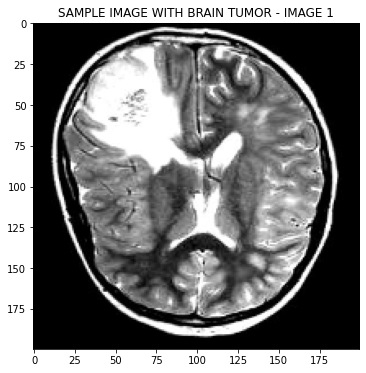

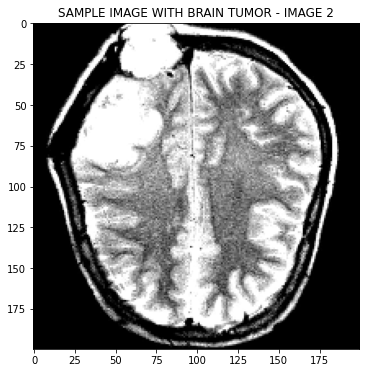

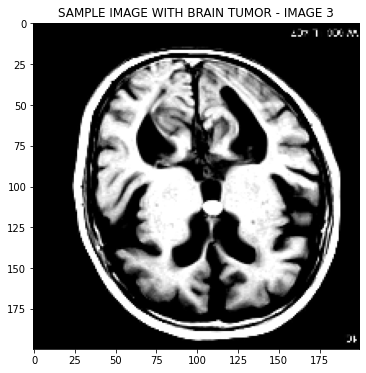

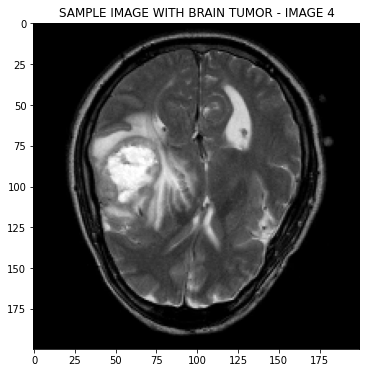

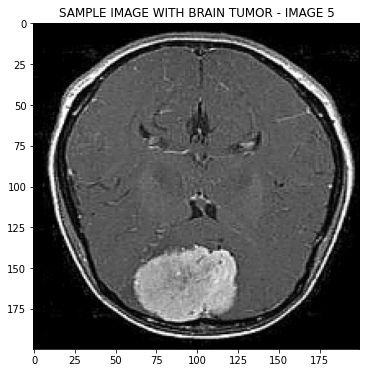

In [24]:
for i in range(5):
    plt.figure(figsize=(10,6))
    plt.imshow(X[i],cmap='gray')
    plt.title("SAMPLE IMAGE WITH BRAIN TUMOR - IMAGE " +  str(i+1))
    plt.show()

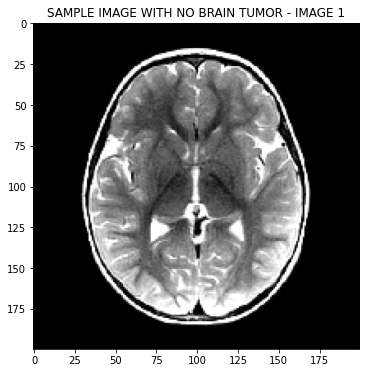

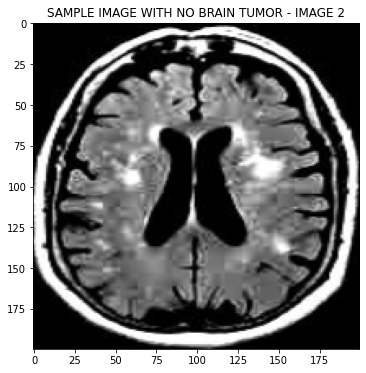

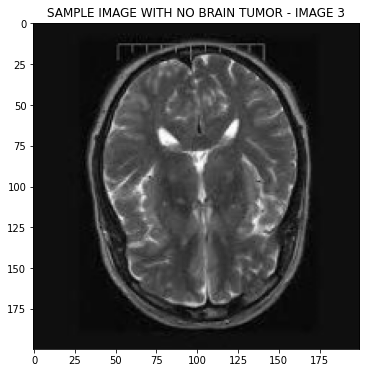

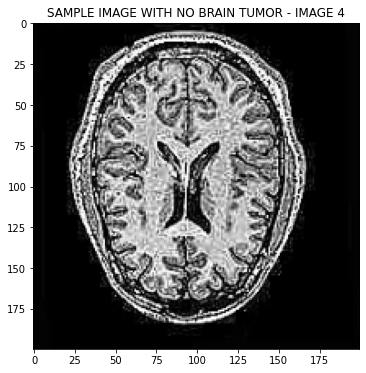

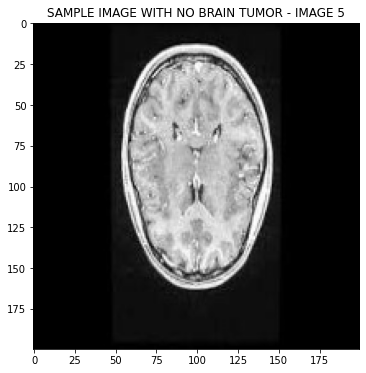

In [25]:
for i in range(5):
    plt.figure(figsize=(10,6))
    plt.imshow(X[i+1500],cmap='gray')
    plt.title("SAMPLE IMAGE WITH NO BRAIN TUMOR - IMAGE " +  str(i+1))
    plt.show()

In [26]:
print(np.shape(tumor_yes),np.shape(tumor_no))

(1500,) (1500,)


As we can see the Dataset is already <i>Balanced</i>, there is no need for upsampling or downsampling of the Data.

In [27]:
print(X_flattened.max())

255


<h2>Feature scaling</h2>

In [28]:
#Scaling the Data
X_flattened = X_flattened/255

In [29]:
#creating a data frame through dictionary

data_dict = {}
dim = np.shape(X_flattened)

for i in range(dim[1]):
    data_dict['feature {}'.format(i+1)] = X_flattened[:,i]
    
data_dict['target'] = Y
    

In [30]:
df = pd.DataFrame(data_dict)
print(df.isnull().any()) #checking if empty cells are present for every column 
print(df.isnull().any().any()) #checking if empty cells are present for entire dataset
df.sample(5)

feature 1        False
feature 2        False
feature 3        False
feature 4        False
feature 5        False
                 ...  
feature 39997    False
feature 39998    False
feature 39999    False
feature 40000    False
target           False
Length: 40001, dtype: bool
False


,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,...,feature 39992,feature 39993,feature 39994,feature 39995,feature 39996,feature 39997,feature 39998,feature 39999,feature 40000,target
2486,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,...,0.027451,0.027451,0.027451,0.023529,0.019608,0.019608,0.019608,0.019608,0.019608,0
1785,0.039216,0.043137,0.043137,0.047059,0.043137,0.043137,0.039216,0.039216,0.039216,0.039216,...,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,0
2244,0.184314,0.176471,0.172549,0.176471,0.180392,0.180392,0.184314,0.176471,0.180392,0.180392,...,0.098039,0.066667,0.062745,0.058824,0.050980,0.050980,0.054902,0.062745,0.066667,0
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2721,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X_flattened,Y,random_state = 0,test_size = 0.2)
print(np.shape(X_train),np.shape(Y_train))


(2400, 40000) (2400,)


In [38]:
X_test,X_val,Y_test,Y_val = train_test_split(X_test,Y_test,random_state = 0,test_size = 0.5)

<h2>Logistic Regression</h2>

In [42]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(C = 0.2,max_iter=1000, random_state= 42)
logReg.fit(X_train, Y_train)


LogisticRegression(C=0.2, max_iter=1000, random_state=42)

In [43]:
Y_pred_Log = logReg.predict(X_val)

In [44]:
from sklearn.metrics import classification_report as cr
from sklearn.metrics import roc_auc_score
print(cr(Y_val,Y_pred_Log))
print("ROC-AUC Score:",roc_auc_score(Y_val,Y_pred_Log) )

LR_AUC = roc_auc_score(Y_val,Y_pred_Log)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       132
           1       0.97      0.98      0.97       168

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

ROC-AUC Score: 0.9691558441558442


<h2>Support Vector Machines </h2>

In [45]:
from sklearn import svm

SVM = svm.SVC()
SVM.fit(X_train, Y_train)

SVC()

In [46]:
Y_pred_svm = SVM.predict(X_val)

In [47]:
print(cr(Y_val,Y_pred_svm))
print("ROC-AUC Score:",roc_auc_score(Y_val,Y_pred_svm) )

SVM_ACCURACY = roc_auc_score(Y_val,Y_pred_svm)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       132
           1       0.95      0.98      0.96       168

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

ROC-AUC Score: 0.9569805194805197


<h2>Random Forests</h2>

In [48]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1400, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 333, 466, 600, 733, 866, 1000, 1133, 1266, 1400], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [49]:
from sklearn.ensemble import RandomForestClassifier 

# Use the random grid to search for best hyperparameters
# First create the base model to tune

rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_val, Y_val)

rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 733,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [50]:
clf = RandomForestClassifier(n_estimators = 733, min_samples_split = 2, min_samples_leaf = 1, max_features = 'auto', max_depth = 50, bootstrap=False) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, Y_train)
 
# performing predictions on the test dataset
y_pred_rf = clf.predict(X_val)

print(cr(Y_val,y_pred_rf))
print("ROC-AUC Score:",roc_auc_score(Y_val,y_pred_rf) )

RF_ACCURACY = roc_auc_score(Y_val,y_pred_rf)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       132
           1       0.94      0.99      0.96       168

    accuracy                           0.96       300
   macro avg       0.96      0.95      0.96       300
weighted avg       0.96      0.96      0.96       300

ROC-AUC Score: 0.9523809523809523


<h2>CAT BOOST</h2>

In [51]:
!pip install catboost
import catboost as ctb

Cb = ctb.CatBoostClassifier()

Cb.fit(X_train, Y_train)

Learning rate set to 0.014972
0:	learn: 0.6867568	total: 9.3s	remaining: 2h 34m 51s
1:	learn: 0.6796666	total: 12.2s	remaining: 1h 41m 32s
2:	learn: 0.6727840	total: 14.9s	remaining: 1h 22m 24s
3:	learn: 0.6658627	total: 17.3s	remaining: 1h 11m 47s
4:	learn: 0.6587006	total: 20.1s	remaining: 1h 6m 32s
5:	learn: 0.6524252	total: 22.9s	remaining: 1h 3m 6s
6:	learn: 0.6463658	total: 25.7s	remaining: 1h 48s
7:	learn: 0.6395021	total: 28.5s	remaining: 58m 52s
8:	learn: 0.6342118	total: 30.9s	remaining: 56m 45s
9:	learn: 0.6284644	total: 33.5s	remaining: 55m 15s
10:	learn: 0.6234280	total: 35.9s	remaining: 53m 45s
11:	learn: 0.6180783	total: 38.5s	remaining: 52m 51s
12:	learn: 0.6138254	total: 41.2s	remaining: 52m 8s
13:	learn: 0.6090449	total: 43.6s	remaining: 51m 7s
14:	learn: 0.6048841	total: 46s	remaining: 50m 20s
15:	learn: 0.6004961	total: 48.5s	remaining: 49m 40s
16:	learn: 0.5950768	total: 51s	remaining: 49m 7s
17:	learn: 0.5902016	total: 53.8s	remaining: 48m 53s
18:	learn: 0.5855085

118:	learn: 0.3431179	total: 5m 34s	remaining: 41m 17s
119:	learn: 0.3419633	total: 5m 37s	remaining: 41m 12s
120:	learn: 0.3405590	total: 5m 39s	remaining: 41m 8s
121:	learn: 0.3393006	total: 5m 42s	remaining: 41m 3s
122:	learn: 0.3377026	total: 5m 44s	remaining: 40m 58s
123:	learn: 0.3363861	total: 5m 47s	remaining: 40m 52s
124:	learn: 0.3352408	total: 5m 49s	remaining: 40m 47s
125:	learn: 0.3336743	total: 5m 52s	remaining: 40m 44s
126:	learn: 0.3322572	total: 5m 54s	remaining: 40m 39s
127:	learn: 0.3312434	total: 5m 57s	remaining: 40m 38s
128:	learn: 0.3300715	total: 6m 3s	remaining: 40m 56s
129:	learn: 0.3288170	total: 6m 6s	remaining: 40m 51s
130:	learn: 0.3278566	total: 6m 8s	remaining: 40m 46s
131:	learn: 0.3265141	total: 6m 11s	remaining: 40m 42s
132:	learn: 0.3253644	total: 6m 13s	remaining: 40m 37s
133:	learn: 0.3241499	total: 6m 16s	remaining: 40m 32s
134:	learn: 0.3229175	total: 6m 18s	remaining: 40m 27s
135:	learn: 0.3217462	total: 6m 21s	remaining: 40m 24s
136:	learn: 0.3

267:	learn: 0.2159901	total: 12m 28s	remaining: 34m 5s
268:	learn: 0.2154347	total: 12m 31s	remaining: 34m 2s
269:	learn: 0.2147489	total: 12m 34s	remaining: 33m 58s
270:	learn: 0.2142128	total: 12m 36s	remaining: 33m 54s
271:	learn: 0.2137291	total: 12m 39s	remaining: 33m 51s
272:	learn: 0.2132961	total: 12m 41s	remaining: 33m 49s
273:	learn: 0.2125402	total: 12m 45s	remaining: 33m 48s
274:	learn: 0.2121382	total: 12m 48s	remaining: 33m 45s
275:	learn: 0.2115695	total: 12m 51s	remaining: 33m 42s
276:	learn: 0.2109667	total: 12m 53s	remaining: 33m 39s
277:	learn: 0.2103279	total: 12m 56s	remaining: 33m 36s
278:	learn: 0.2098926	total: 12m 59s	remaining: 33m 34s
279:	learn: 0.2091826	total: 13m 2s	remaining: 33m 31s
280:	learn: 0.2084601	total: 13m 5s	remaining: 33m 29s
281:	learn: 0.2077679	total: 13m 7s	remaining: 33m 25s
282:	learn: 0.2073157	total: 13m 10s	remaining: 33m 22s
283:	learn: 0.2068464	total: 13m 12s	remaining: 33m 18s
284:	learn: 0.2063274	total: 13m 15s	remaining: 33m 1

415:	learn: 0.1455036	total: 19m 17s	remaining: 27m 4s
416:	learn: 0.1451181	total: 19m 20s	remaining: 27m 2s
417:	learn: 0.1445837	total: 19m 23s	remaining: 27m
418:	learn: 0.1439746	total: 19m 26s	remaining: 26m 57s
419:	learn: 0.1437355	total: 19m 28s	remaining: 26m 53s
420:	learn: 0.1434117	total: 19m 31s	remaining: 26m 50s
421:	learn: 0.1430879	total: 19m 33s	remaining: 26m 47s
422:	learn: 0.1427694	total: 19m 36s	remaining: 26m 44s
423:	learn: 0.1425420	total: 19m 38s	remaining: 26m 41s
424:	learn: 0.1421503	total: 19m 41s	remaining: 26m 38s
425:	learn: 0.1418489	total: 19m 43s	remaining: 26m 35s
426:	learn: 0.1414702	total: 19m 46s	remaining: 26m 31s
427:	learn: 0.1411054	total: 19m 48s	remaining: 26m 28s
428:	learn: 0.1405666	total: 19m 51s	remaining: 26m 25s
429:	learn: 0.1401965	total: 19m 54s	remaining: 26m 22s
430:	learn: 0.1397632	total: 19m 57s	remaining: 26m 20s
431:	learn: 0.1393744	total: 20m	remaining: 26m 18s
432:	learn: 0.1389539	total: 20m 3s	remaining: 26m 15s
433

563:	learn: 0.0955689	total: 26m 1s	remaining: 20m 6s
564:	learn: 0.0952638	total: 26m 3s	remaining: 20m 3s
565:	learn: 0.0949492	total: 26m 6s	remaining: 20m 1s
566:	learn: 0.0947250	total: 26m 8s	remaining: 19m 58s
567:	learn: 0.0944306	total: 26m 11s	remaining: 19m 55s
568:	learn: 0.0940420	total: 26m 13s	remaining: 19m 51s
569:	learn: 0.0937140	total: 26m 15s	remaining: 19m 48s
570:	learn: 0.0934130	total: 26m 18s	remaining: 19m 45s
571:	learn: 0.0931963	total: 26m 20s	remaining: 19m 42s
572:	learn: 0.0928998	total: 26m 23s	remaining: 19m 39s
573:	learn: 0.0926472	total: 26m 26s	remaining: 19m 37s
574:	learn: 0.0923933	total: 26m 29s	remaining: 19m 34s
575:	learn: 0.0921053	total: 26m 32s	remaining: 19m 31s
576:	learn: 0.0918253	total: 26m 34s	remaining: 19m 29s
577:	learn: 0.0916492	total: 26m 37s	remaining: 19m 26s
578:	learn: 0.0913461	total: 26m 39s	remaining: 19m 23s
579:	learn: 0.0909854	total: 26m 42s	remaining: 19m 20s
580:	learn: 0.0906484	total: 26m 44s	remaining: 19m 17s

711:	learn: 0.0581891	total: 32m 34s	remaining: 13m 10s
712:	learn: 0.0579751	total: 32m 37s	remaining: 13m 7s
713:	learn: 0.0577087	total: 32m 39s	remaining: 13m 4s
714:	learn: 0.0575425	total: 32m 42s	remaining: 13m 2s
715:	learn: 0.0573526	total: 32m 44s	remaining: 12m 59s
716:	learn: 0.0571717	total: 32m 47s	remaining: 12m 56s
717:	learn: 0.0570183	total: 32m 49s	remaining: 12m 53s
718:	learn: 0.0568341	total: 32m 52s	remaining: 12m 50s
719:	learn: 0.0566109	total: 32m 55s	remaining: 12m 48s
720:	learn: 0.0564484	total: 32m 58s	remaining: 12m 45s
721:	learn: 0.0562583	total: 33m 1s	remaining: 12m 43s
722:	learn: 0.0560158	total: 33m 5s	remaining: 12m 40s
723:	learn: 0.0558879	total: 33m 8s	remaining: 12m 38s
724:	learn: 0.0557041	total: 33m 11s	remaining: 12m 35s
725:	learn: 0.0555045	total: 33m 13s	remaining: 12m 32s
726:	learn: 0.0553360	total: 33m 16s	remaining: 12m 29s
727:	learn: 0.0551024	total: 33m 18s	remaining: 12m 26s
728:	learn: 0.0549388	total: 33m 21s	remaining: 12m 24

860:	learn: 0.0358798	total: 39m 1s	remaining: 6m 18s
861:	learn: 0.0357729	total: 39m 4s	remaining: 6m 15s
862:	learn: 0.0356493	total: 39m 7s	remaining: 6m 12s
863:	learn: 0.0355232	total: 39m 10s	remaining: 6m 9s
864:	learn: 0.0354078	total: 39m 12s	remaining: 6m 7s
865:	learn: 0.0353040	total: 39m 16s	remaining: 6m 4s
866:	learn: 0.0351971	total: 39m 19s	remaining: 6m 1s
867:	learn: 0.0350780	total: 39m 22s	remaining: 5m 59s
868:	learn: 0.0349853	total: 39m 24s	remaining: 5m 56s
869:	learn: 0.0348715	total: 39m 27s	remaining: 5m 53s
870:	learn: 0.0347564	total: 39m 29s	remaining: 5m 50s
871:	learn: 0.0346699	total: 39m 32s	remaining: 5m 48s
872:	learn: 0.0345847	total: 39m 34s	remaining: 5m 45s
873:	learn: 0.0344886	total: 39m 36s	remaining: 5m 42s
874:	learn: 0.0343717	total: 39m 39s	remaining: 5m 39s
875:	learn: 0.0342510	total: 39m 41s	remaining: 5m 37s
876:	learn: 0.0341276	total: 39m 44s	remaining: 5m 34s
877:	learn: 0.0340134	total: 39m 46s	remaining: 5m 31s
878:	learn: 0.033

In [52]:
Y_pred_Cb = Cb.predict(X_val)

In [53]:
print(cr(Y_val,Y_pred_Cb))
print("ROC-AUC Score:",roc_auc_score(Y_val,Y_pred_Cb) )

CB_ACCURACY = roc_auc_score(Y_val,Y_pred_Cb)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       132
           1       0.96      0.98      0.97       168

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

ROC-AUC Score: 0.9683441558441559


<h2>KNN</h2>

In [70]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier 

classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')  
classifier.fit(X_train, Y_train) 

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [71]:
Y_pred_Knn = classifier.predict(X_val)

In [72]:
print(cr(Y_val,Y_pred_Knn))
print("ROC-AUC Score:",roc_auc_score(Y_val,Y_pred_Knn) )

KNN_ACCURACY = roc_auc_score(Y_val,Y_pred_Log)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       132
           1       0.97      0.85      0.91       168

    accuracy                           0.90       300
   macro avg       0.90      0.91      0.90       300
weighted avg       0.91      0.90      0.90       300

ROC-AUC Score: 0.910443722943723


<h2>GAUSSIAN NAIVE BAYES CLASSFIER

In [57]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

nb = GaussianNB();
nb.fit(X_train, Y_train)

y_predict_gnbe = nb.predict(X_val)
print(cr(Y_val,Y_pred_Knn))
print("ROC-AUC Score:",roc_auc_score(Y_val,y_predict_gnbe) )

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       132
           1       0.97      0.85      0.91       168

    accuracy                           0.90       300
   macro avg       0.90      0.91      0.90       300
weighted avg       0.91      0.90      0.90       300

ROC-AUC Score: 0.7031926406926406
